This test is to see if the unbalanced data is making results better than expected. \
I will try using Lucas best model to see if the results imporve with balanced number of points per S (separation).\
Originally S = {0.6,1.2} contains > 3000 points

PC on 24/10


In [2]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


### Data Pre-Procesing

In [50]:
txt_path_25 = '/home/pcornejo/Tesis/Optimizacion_LIB/resources/df_cdrag_25.txt'
txt_path_53 = '/home/pcornejo/Tesis/Optimizacion_LIB/resources/df_cdrag_53.txt'
txt_path_74 = '/home/pcornejo/Tesis/Optimizacion_LIB/resources/df_cdrag_74.txt'
txt_path_102 = '/home/pcornejo/Tesis/Optimizacion_LIB/resources/df_cdrag_102.txt'

# Load the datasets
df_25 = pd.read_csv(txt_path_25)
df_53 = pd.read_csv(txt_path_53)
df_74 = pd.read_csv(txt_path_74)
df_102 = pd.read_csv(txt_path_102)

# Merge the training datasets (25 and 53)
df_train = pd.concat([df_25, df_53])

# Validation and test sets
df_val = df_102
df_test = df_74

In [51]:
# Count the occurrences of each unique value in the 'K' column
k_distribution = df_train['K'].value_counts()

# Print the distribution
print(k_distribution)

K
1.200    6370
0.600    3430
0.937      50
0.961      50
0.986      50
1.010      50
1.035      50
1.059      50
1.084      50
1.108      50
1.133      50
1.157      50
1.182      50
1.206      50
1.231      50
1.255      50
1.280      50
1.304      50
1.329      50
1.353      50
1.378      50
1.402      50
1.427      50
1.451      50
1.476      50
0.912      50
0.888      50
0.863      50
0.545      50
0.300      50
0.324      50
0.349      50
0.373      50
0.398      50
0.422      50
0.447      50
0.471      50
0.496      50
0.520      50
0.569      50
0.839      50
0.594      50
0.618      50
0.643      50
0.667      50
0.692      50
0.716      50
0.741      50
0.765      50
0.790      50
0.814      50
1.500      50
Name: count, dtype: int64


In [52]:
# Define the desired maximum number of samples per class for K
max_samples_per_class = 50

# Count the occurrences of each K value
class_counts = df_train['K'].value_counts()

# List to store the balanced training data
balanced_train_data = []

# For each unique value in 'K'
for value, count in class_counts.items():
    # If the class is overrepresented, sample only the maximum desired number of points
    if count > max_samples_per_class:
        sampled_data = df_train[df_train['K'] == value].sample(n=max_samples_per_class, random_state=42)
    else:
        # If the class has fewer or equal points, keep all points
        sampled_data = df_train[df_train['K'] == value]
    
    # Append the sampled data to the list
    balanced_train_data.append(sampled_data)

# Concatenate the list into a new balanced DataFrame
df_train_balanced = pd.concat(balanced_train_data)

# Reset index for the balanced dataset (optional)
df_train_balanced = df_train_balanced.reset_index(drop=True)

# Now your df_train is balanced with a maximum of 50 samples per K value
print(df_train_balanced['K'].value_counts())

K
1.200    50
0.600    50
0.545    50
0.300    50
0.324    50
0.349    50
0.373    50
0.398    50
0.422    50
0.447    50
0.471    50
0.496    50
0.520    50
0.569    50
0.839    50
0.594    50
0.618    50
0.643    50
0.667    50
0.692    50
0.716    50
0.741    50
0.765    50
0.790    50
0.814    50
0.863    50
0.888    50
0.912    50
1.182    50
0.937    50
0.961    50
0.986    50
1.010    50
1.035    50
1.059    50
1.084    50
1.108    50
1.133    50
1.157    50
1.206    50
1.476    50
1.231    50
1.255    50
1.280    50
1.304    50
1.329    50
1.353    50
1.378    50
1.402    50
1.427    50
1.451    50
1.500    50
Name: count, dtype: int64


In [54]:
# Select only the columns we need
selected_columns = ['K', 'Rem', 'cdrag']

df_train_selected = df_train_balanced[selected_columns]
df_val_selected = df_val[selected_columns]
df_test_selected = df_test[selected_columns]

# Display the first few rows of each selected DataFrame
print("Training set:")
print(df_train_selected.head())

print("\nValidation set:")
print(df_val_selected.head())

print("\nTest set:")
print(df_test_selected.head())

# Print the shape of each selected DataFrame
print(f"\nTraining set shape: {df_train_selected.shape}")
print(f"Validation set shape: {df_val_selected.shape}")
print(f"Test set shape: {df_test_selected.shape}")

Training set:
     K          Rem     cdrag
0  1.2  8646.548961  1.430969
1  1.2  2535.619222  1.704960
2  1.2  2151.756300  1.737590
3  1.2  6895.384295  1.561479
4  1.2  7174.069786  1.507904

Validation set:
     K          Rem     cdrag
0  0.6  2796.592710  2.122891
1  0.6  2796.592710  1.990789
2  0.6  2446.261529  2.187497
3  0.6  2128.077694  2.325816
4  0.6  1909.194425  2.098941

Test set:
     K          Rem     cdrag
0  0.6  2827.361047  2.035007
1  0.6  2827.361047  2.267297
2  0.6  2356.426510  2.279616
3  0.6  2038.344639  2.378673
4  0.6  1885.685153  2.250377

Training set shape: (2600, 3)
Validation set shape: (17178, 3)
Test set shape: (12210, 3)


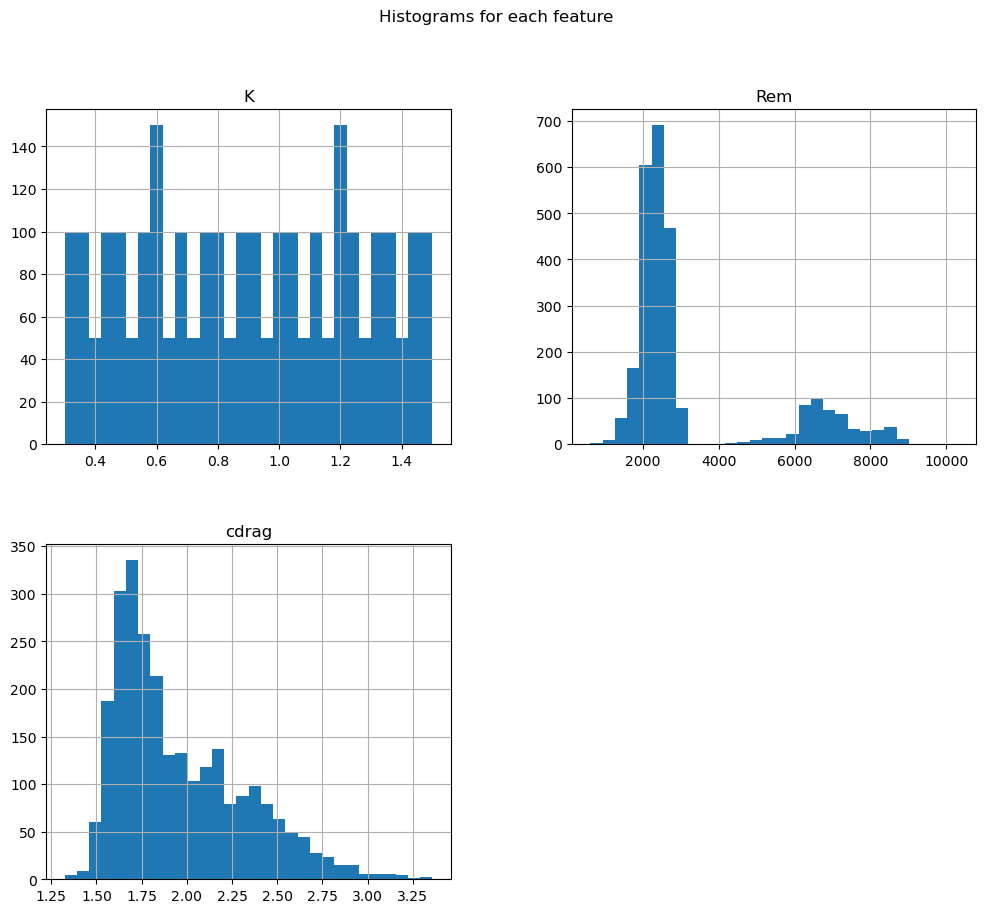

In [55]:
df_train_selected.hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms for each feature')
plt.show()

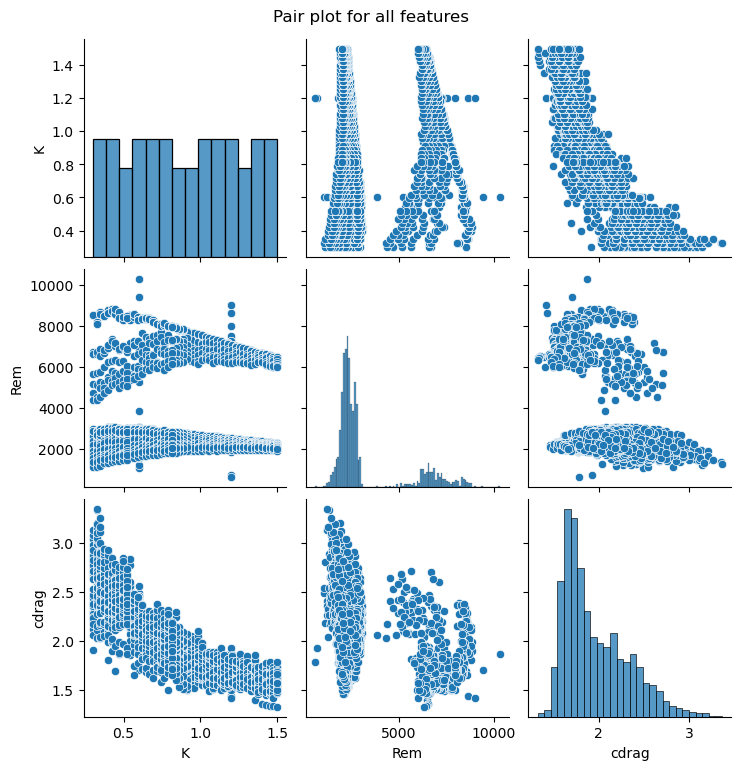

In [59]:
import seaborn as sns
sns.pairplot(df_train_selected[['K', 'Rem', 'cdrag']])
plt.suptitle('Pair plot for all features', y=1.02)
plt.show()


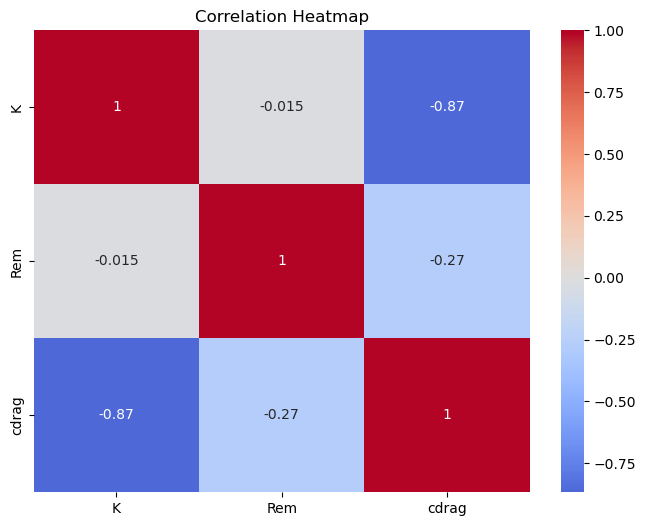

In [61]:
plt.figure(figsize=(8, 6))
corr_matrix = df_train_selected[['K', 'Rem', 'cdrag']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
df_train_selected.describe()

,K,Rem,cdrag
count,2600.000000,2600.000000,2600.000000
mean,0.900000,3249.817185,1.958238
std,0.351707,1932.778890,0.354718
min,0.300000,616.932652,1.324451
25%,0.598500,2159.689638,1.680951
50%,0.900000,2415.179674,1.843015
75%,1.201500,2828.907805,2.184164
max,1.500000,10309.126500,3.357568


In [63]:
X_train = df_train_selected[['K', 'Rem']]
y_train = df_train_selected['cdrag']

X_test = df_test_selected[['K', 'Rem']]
y_test = df_test_selected['cdrag']

# renombrando
X_train.rename(columns={'Rem':'Re'}, inplace=True)
X_test.rename(columns={'Rem':'Re'}, inplace=True)

/tmp/ipykernel_3449380/4170746260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.rename(columns={'Rem':'Re'}, inplace=True)
/tmp/ipykernel_3449380/4170746260.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.rename(columns={'Rem':'Re'}, inplace=True)


In [70]:
y_test

0        2.035007
1        2.267297
2        2.279616
3        2.378673
4        2.250377
           ...   
12205    1.507019
12206    1.561671
12207    1.481459
12208    1.568043
12209    1.499727
Name: cdrag, Length: 12210, dtype: float64

In [64]:
from pysr import PySRRegressor

In [65]:
rmsle_loss = """ function rmsle(prediction, target)
    # Calcular los logaritmos con un mínimo de 0.001 para evitar valores negativos o cero
    log_true = log.(max.(target, 0.001) .+ 1)
    log_pred = log.(max.(prediction, 0.001) .+ 1)

    # Calcular el error cuadrático medio logarítmico
    rmsle_value = (log_pred .- log_true).^2

    # Calcular el valor de RMSLE como la raíz cuadrada de la suma entre la cantidad de elementos
    return sqrt(sum(rmsle_value) / length(target))
end
"""

In [66]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+","-","*" ,"/", "^"],
    unary_operators=[],
    elementwise_loss= rmsle_loss,
    population_size=200,
    verbosity=1,
    maxsize=15,
    parsimony=0.1,
    constraints={'^':(-1,1)},
    #nested_constraints={'^':{'^':0}},
    complexity_of_variables = 2,
    random_state = 0,
    progress=True
)

model.fit(X_train, y_train)

/home/pcornejo/anaconda3/envs/MetaSRBench9/lib/python3.8/site-packages/pysr/sr.py:1310: UserWarning: Note: Setting `random_state` without also setting `deterministic` to True and `procs` to 0 will result in non-deterministic searches. 
  warnings.warn(
/home/pcornejo/anaconda3/envs/MetaSRBench9/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.620e+04
Head worker occupation: 5.1%
Progress: 38 / 450 total iterations (8.444%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           9.354e-02  5.314e+00  y = 0.62375 + 1.2193
4           4.731e-02  6.816e-01  y = 2.8709 - K
6           3.637e-02  1.316e-01  y = (K ^ -0.5896) - -0.80606
8           3.603e-02  4.580e-03  y = 0.87045 + (1.3561 / (K + 0.43539))
10          3.598e-02  7.596e-04  y = 0.96955 - (1.1152 / (-0.12358 - (K - -0.20165)))
11          3.589e-02  2.457e-03  y = (((0.033126 / K) + K) ^ -0.70715) + 0.83463
15          3.589e-02  2.535e-05  y = 0.99028 - (1.0659 / (((0.73887 / (Re * 0.17243)) - 0.30128...
                                  ) - K))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          1.8430057   
	1        0.227210                                       2.870851 - K   
	2  >>>>  0.134737                        1.8147082 / (K ^ 0.3521402)   
	3        0.001877          ((K + 0.2879051) ^ -1.0393859) + 1.038058   
	4        0.000628  (((K * 0.8098865) + 0.42272156) ^ -1.2819848) ...   
	5        0.059911  1.2270044 - ((Re ^ -0.0649127) / (-0.05778848 ...   
	6        0.044023  1.2289683 - ((Re ^ -0.13560115) / (0.5672728 *...   
	7        0.000524  (1.2289683 - ((Re ^ -0.13560115) / ((-0.059310...   
	
	       loss  complexity  
	0  0.093543           1  
	1  0.047313           4  
	2  0.036137           6  
	3  0.036001           8  
	4  0.035956          10  
	5  0.033865          11  
	6  0.031011          13  
	7  0.030979          15  
]

In [67]:
best_equation = model.equations_.iloc[7]['equation']
print(best_equation)

(1.2289683 - ((Re ^ -0.13560115) / ((-0.05931058 - K) * 0.5672728))) / 1.0033154


In [73]:
# Ecuacion 7

def cdrag(S, Re):
    return S**(-0.6) + 5*Re**(-0.23)

def cdrag_gp(S, Re):
    return (1.2289683 - ((Re ** -0.13560115) / ((-0.05931058 - S) * 0.5672728))) / 1.0033154

# Calcular cdrag_pred y cdrag_gp_pred en vectores separados
cdrag_pred = X_test.apply(lambda row: cdrag(row['K'], row['Re']), axis=1).values
cdrag_gp_pred = X_test.apply(lambda row: cdrag_gp(row['K'], row['Re']), axis=1).values

# Calcular R^2 y MSE para cdrag
r2_cdrag = r2_score(y_test, cdrag_pred)
mse_cdrag = mean_squared_error(y_test, cdrag_pred)

# Calcular MAE y MAPE para cdrag
mae_cdrag = mean_absolute_error(y_test, cdrag_pred)
mape_cdrag = mean_absolute_percentage_error(y_test, cdrag_pred)

# Calcular R^2 y MSE para cdrag_gp
r2_cdrag_gp = r2_score(y_test, cdrag_gp_pred)
mse_cdrag_gp = mean_squared_error(y_test, cdrag_gp_pred)

# Calcular MAE y MAPE para cdrag_gp
mae_cdrag_gp = mean_absolute_error(y_test, cdrag_gp_pred)
mape_cdrag_gp = mean_absolute_percentage_error(y_test, cdrag_gp_pred)

#  Mostrar Metricas 

print(f"R^2 cdrag original: {r2_cdrag}, R^2 cdrag GPLearn: {r2_cdrag_gp} ")
print(f"MSE cdrag original: {mse_cdrag}, MSE cdrag GPLearn: {mse_cdrag_gp} ")
print(f"MAE cdrag original: {mae_cdrag}, MAE cdrag GPLearn: {mae_cdrag_gp} ")
print(f"MAPE cdrag original: {mape_cdrag*100} %, MAPE cdrag GPLearn: {mape_cdrag_gp*100} % ")

R^2 cdrag original: 0.8880886315681328, R^2 cdrag GPLearn: 0.852080505500803 
MSE cdrag original: 0.010770901556296916, MSE cdrag GPLearn: 0.014236501043931264 
MAE cdrag original: 0.07612169309771742, MAE cdrag GPLearn: 0.08907062898169361 
MAPE cdrag original: 3.7870462931369997 %, MAPE cdrag GPLearn: 4.396313251412294 % 
